In [167]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import pandas as pd

In [168]:
xs = np.array([1,2,3,4,5]) #creating a toy dataset to test algorithms on
ys = np.array([5,4,6,5,6]) #We usually do this to see if we have implemented an algorithm correctly
#if a general algorithm is implemented correctly for this dataset it can be used for all kinds of datasets
#You just have to bring your dataset in this form of x and y before passing them through a function

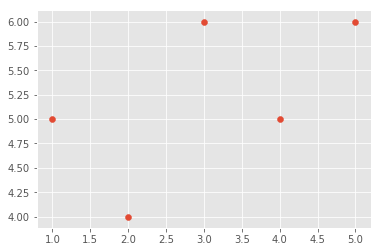

In [169]:
plt.scatter(xs,ys)

In [165]:
#function to find best fit slope (weight) and y-intercept (bias), derivation of this formula was done in class
def best_fit_slope_intercept(xs,ys):
    theta = (((np.mean(xs)*np.mean(ys)) - np.mean (xs*ys))/ 
             ((np.mean(xs)**2)-np.mean(xs**2)))
    #np.mean function gives mean of all the numbers in an np array
    b = np.mean(ys) - theta*np.mean(xs)
    return theta,b
    
theta,b = best_fit_slope_intercept(xs,ys)

print(theta,b)

0.29999999999999893 4.300000000000003


In [166]:
y_predicted = theta*xs + b #Once we have our weight and bias, we can use these values to find predicted point for any x
#We use the formula (y_hat = theta*x + b) to get the predicted value for any x

In [30]:
ys

array([5, 4, 6, 5, 6])

In [31]:
y_predicted

array([4.6, 4.9, 5.2, 5.5, 5.8])

In [58]:
np.mean((ys-y_predicted)**2)

0.38

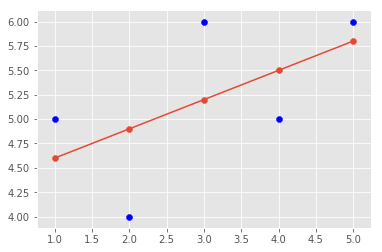

In [171]:
plt.scatter(xs,ys,color='b') #scatter is used to scatter the points given in the x and y arrays 
#where x is the list of the x-coordinates of all the points and y is the list of the y-coordinates of all the points 
plt.plot(xs , y_predicted)
#This plots a continuous line graph on the plot
#since all y_predicted values are calculated using the formula of line on corresponding x values
#all the points (x,y_predicted) have to be colinear and hence a line is plotted
plt.scatter(xs,y_predicted)
plt.show()

In [10]:
def predict(x): #Created a function which returns predicted values for ease of reusability
    return (theta*x + b)

In [11]:
predict(np.array([3,8,6,4,2])) #numpy array arithematics make it possible to find multiple predicted values at once

array([5.2, 6.7, 6.1, 5.5, 4.9])

In [12]:
predict(25)

11.799999999999976

In [36]:
df = pd.read_csv('bike sharing hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [39]:
df = pd.read_csv('bike sharing hour.csv')
#list(df)
df.drop(['dteday'],axis=1,inplace = True)
df.drop(['instant'],axis=1,inplace = True)
full_data = df.astype(float).values.tolist()
df.head()
#Everything about data frames was already explained in KNN  Notebook

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [66]:
header = list(df) #returns the names of all columns in tbe dataframe

In [72]:
header

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [73]:
header = header[-3:]

In [74]:
header

['casual', 'registered', 'cnt']

In [75]:
xs = np.array(full_data)[:,-3:-1] #Now we have to bring our data in the form of toy dataset 
#for applying best_fit_slope_intercept function
#We are only considering the last 2 columns of features here as all other features are either categorical or
#too random to apply regression on (i.e they dont follow a specific shape)
ys = np.array(full_data)[:,-1]

In [76]:
xs #17379 rows and 2 columns

array([[ 3., 13.],
       [ 8., 32.],
       [ 5., 27.],
       ...,
       [ 7., 83.],
       [13., 48.],
       [12., 37.]])

In [77]:
ys.shape #gives the number of rows and colums in a 2D array and number of rows in a 1D array
#Experiment with this function a lot so that you understand all the different types of shapes your data can assumee.
#This function is really helpful while dealing with Image and Audio Data

(17379,)

2.555222246702297 98.3024206379183


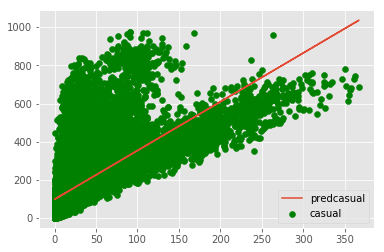

1.1650320363746498 10.296458231132732


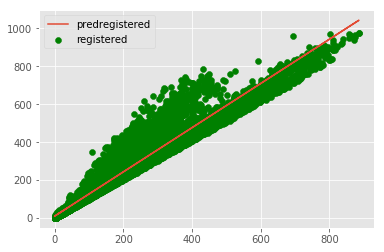

In [78]:
for i in range(0,len(xs[0])):
    theta1,b1 = best_fit_slope_intercept(xs[:,i],ys)
    print(theta1,b1)
    plt.scatter(xs[:,i],ys,label = 
                header[i],color = 'g') #Since I only took columns -3 and -2
    #i have to label my line and scatter plot points as such thus I manipulated the slicing of my header list
    plt.plot(xs[:,i],theta1*xs[:,i]+b1,label = 
             'pred' + header[i])
    plt.legend(loc = 'best') #Gives the legend to the graph for better understanding during analysis
    #plt.savefig('plot_'+header[-3+i]+'.png') #Saves the graph in the notebook folder as png file
    plt.show() #Shows the graph

In [79]:
#As we had studied earlier, since simple linear regression only considers one attribute at a time
#It cannot figure out the correlation that exists between different attributes and that's why we use 
#multiple linear regression for datasets with more than one feature